# Предобработка и выбор признаков

In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_table('skempi_v2.csv', sep=';')
df

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_mut_parsed,koff_wt (s^(-1)),koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,5.260000e-11,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,8.330000e-12,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,1.020000e-07,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,1.720000e-10,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,1.920000e-09,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080,3QIB_ABP_CD,KP9R,KP8R,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",2.4E-04,2.400000e-04,5.5E-06,5.500000e-06,...,0.500,2.2E-02,0.022,NaN,NaN,NaN,NaN,NaN,SPR,2
7081,3QIB_ABP_CD,TP12A,TP11A,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",>1.1E-03,1.100000e-03,5.5E-06,5.500000e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2
7082,3QIB_ABP_CD,TP12S,TP11S,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",3.38E-05,3.380000e-05,5.5E-06,5.500000e-06,...,0.134,2.2E-02,0.022,NaN,NaN,NaN,NaN,NaN,SPR,2
7083,3QIB_ABP_CD,TP12N,TP11N,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",4.34E-05,4.340000e-05,5.5E-06,5.500000e-06,...,0.175,2.2E-02,0.022,NaN,NaN,NaN,NaN,NaN,SPR,2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7085 entries, 0 to 7084
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   #Pdb                          7085 non-null   object 
 1   Mutation(s)_PDB               7085 non-null   object 
 2   Mutation(s)_cleaned           7085 non-null   object 
 3   iMutation_Location(s)         7085 non-null   object 
 4   Hold_out_type                 3311 non-null   object 
 5   Hold_out_proteins             7085 non-null   object 
 6   Affinity_mut (M)              7085 non-null   object 
 7   Affinity_mut_parsed           6800 non-null   float64
 8   Affinity_wt (M)               7085 non-null   object 
 9   Affinity_wt_parsed            7083 non-null   float64
 10  Reference                     7085 non-null   object 
 11  Protein 1                     7085 non-null   object 
 12  Protein 2                     7085 non-null   object 
 13  Tem

мы будем учиться предсказывать знак изменения свободной энергии связывания, поэтому те комплексы, для которых affinity неизвестны, придется исключить

In [44]:
df.dropna(axis=0, subset=['Affinity_mut_parsed', 'Affinity_wt_parsed'], ignore_index=True, inplace=True)
df

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_mut_parsed,koff_wt (s^(-1)),koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,5.260000e-11,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,8.330000e-12,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,1.020000e-07,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,1.720000e-10,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,1.920000e-09,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,3QIB_ABP_CD,KP9R,KP8R,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",2.4E-04,2.400000e-04,5.5E-06,5.500000e-06,...,0.500,2.2E-02,0.022,NaN,NaN,NaN,NaN,NaN,SPR,2
6794,3QIB_ABP_CD,TP12A,TP11A,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",>1.1E-03,1.100000e-03,5.5E-06,5.500000e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2
6795,3QIB_ABP_CD,TP12S,TP11S,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",3.38E-05,3.380000e-05,5.5E-06,5.500000e-06,...,0.134,2.2E-02,0.022,NaN,NaN,NaN,NaN,NaN,SPR,2
6796,3QIB_ABP_CD,TP12N,TP11N,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",4.34E-05,4.340000e-05,5.5E-06,5.500000e-06,...,0.175,2.2E-02,0.022,NaN,NaN,NaN,NaN,NaN,SPR,2


Также уберем те признаки, которые нам вряд ли дальше будут полезны: кинетические параметры, известные только для небольшого числа объектов, столбцы вроде Reference со справочной информацией, а также не обработанные признаки ('Mutation(s)_PDB', 'Affinity_mut (M)', 'Affinity_wt (M)')

In [45]:
df.drop(columns=df.columns[14:], inplace=True)
df.drop(columns=['Mutation(s)_PDB', 'Affinity_mut (M)', 'Affinity_wt (M)', 'Reference'], inplace=True)
df

,#Pdb,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut_parsed,Affinity_wt_parsed,Protein 1,Protein 2,Temperature
0,1CSE_E_I,LI38G,COR,Pr/PI,Pr/PI,5.260000e-11,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
1,1CSE_E_I,LI38S,COR,Pr/PI,Pr/PI,8.330000e-12,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
2,1CSE_E_I,LI38P,COR,Pr/PI,Pr/PI,1.020000e-07,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
3,1CSE_E_I,LI38I,COR,Pr/PI,Pr/PI,1.720000e-10,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
4,1CSE_E_I,LI38D,COR,Pr/PI,Pr/PI,1.920000e-09,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
...,...,...,...,...,...,...,...,...,...,...
6793,3QIB_ABP_CD,KP8R,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",2.400000e-04,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298
6794,3QIB_ABP_CD,TP11A,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",1.100000e-03,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298
6795,3QIB_ABP_CD,TP11S,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",3.380000e-05,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298
6796,3QIB_ABP_CD,TP11N,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",4.340000e-05,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298


Стоит отметить, что температура пока что с типом данных object - это не подходит для вычисления dG; поэтому теперь надо аккуратно обработать этот признак. Для заполнения четырех Nan'ов используем 298 - стандартную температуру (и одновременно "моду" для данного признака).

In [46]:
df['Temperature'].value_counts(dropna=False)

Temperature
298             2378
298(assumed)    2225
294             1145
293              330
303              129
295              111
310              109
308              107
296               78
277               36
283               29
305               28
299               23
323               13
279               13
273                8
338                6
300                5
288                5
318                5
281                4
NaN                4
333                3
301                2
291                1
285                1
Name: count, dtype: int64

In [47]:
df.fillna({'Temperature':'298'}, inplace=True)

In [48]:
df.iloc[:, -1] = df['Temperature'].mask(df['Temperature'].str.len() > 3, '298')

In [49]:
df['Temperature'].value_counts(dropna=False)

Temperature
298    4607
294    1145
293     330
303     129
295     111
310     109
308     107
296      78
277      36
283      29
305      28
299      23
323      13
279      13
273       8
338       6
300       5
288       5
318       5
281       4
333       3
301       2
291       1
285       1
Name: count, dtype: int64

In [50]:
df['Temperature'] = df['Temperature'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   #Pdb                   6798 non-null   object 
 1   Mutation(s)_cleaned    6798 non-null   object 
 2   iMutation_Location(s)  6798 non-null   object 
 3   Hold_out_type          3157 non-null   object 
 4   Hold_out_proteins      6798 non-null   object 
 5   Affinity_mut_parsed    6798 non-null   float64
 6   Affinity_wt_parsed     6798 non-null   float64
 7   Protein 1              6798 non-null   object 
 8   Protein 2              6798 non-null   object 
 9   Temperature            6798 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 504.7+ KB


In [51]:
df

,#Pdb,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut_parsed,Affinity_wt_parsed,Protein 1,Protein 2,Temperature
0,1CSE_E_I,LI38G,COR,Pr/PI,Pr/PI,5.260000e-11,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
1,1CSE_E_I,LI38S,COR,Pr/PI,Pr/PI,8.330000e-12,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
2,1CSE_E_I,LI38P,COR,Pr/PI,Pr/PI,1.020000e-07,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
3,1CSE_E_I,LI38I,COR,Pr/PI,Pr/PI,1.720000e-10,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
4,1CSE_E_I,LI38D,COR,Pr/PI,Pr/PI,1.920000e-09,1.120000e-12,Subtilisin Carlsberg,Eglin c,294
...,...,...,...,...,...,...,...,...,...,...
6793,3QIB_ABP_CD,KP8R,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",2.400000e-04,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298
6794,3QIB_ABP_CD,TP11A,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",1.100000e-03,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298
6795,3QIB_ABP_CD,TP11S,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",3.380000e-05,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298
6796,3QIB_ABP_CD,TP11N,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",4.340000e-05,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298


" A. The affinities (Kd) of the wild-type complexes are in the column 'affinity_wt' and the affinities of the mutant are in the column 'affinity_mut'. These can be converted to ΔG values by the relationship ΔG = RT ln Kd; at room temperature this is ΔG = (8.314/4184)*(273.15 + 25.0) * ln(wt), where ln() is the natural logarithm. The changes in affinity upon mutation is calculated as ΔΔG = ΔGmut-ΔGwt. "

Немного модифицируем выражение: ΔGmut-ΔGwt = RT ln Kd_mut - RT ln Kd_wt = RT(ln Kd_mut - n Kd_wt) = RT ln (Kd_mut / Kd_wt)

в итоге будем считать так:  ΔΔG = RT ln (Kd_mut / Kd_wt) 

(здесь мы видим, что знак ddG зависит только от выражения под логарифмом, так как R > 0 и T > 0, поэтому не страшно, что несколько значений T мы просто вставили)

In [52]:
R = 8.314/4184

df['ddG'] = R * df['Temperature'] * (
    np.log(df['Affinity_mut_parsed']) - np.log(df['Affinity_wt_parsed'])
)

df['label'] = (df['ddG'] < 0).astype(int)  #бинаризуем, так как предсказывать будем знак

In [53]:
df

,#Pdb,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut_parsed,Affinity_wt_parsed,Protein 1,Protein 2,Temperature,ddG,label
0,1CSE_E_I,LI38G,COR,Pr/PI,Pr/PI,5.260000e-11,1.120000e-12,Subtilisin Carlsberg,Eglin c,294,2.248833,0
1,1CSE_E_I,LI38S,COR,Pr/PI,Pr/PI,8.330000e-12,1.120000e-12,Subtilisin Carlsberg,Eglin c,294,1.172229,0
2,1CSE_E_I,LI38P,COR,Pr/PI,Pr/PI,1.020000e-07,1.120000e-12,Subtilisin Carlsberg,Eglin c,294,6.671276,0
3,1CSE_E_I,LI38I,COR,Pr/PI,Pr/PI,1.720000e-10,1.120000e-12,Subtilisin Carlsberg,Eglin c,294,2.940988,0
4,1CSE_E_I,LI38D,COR,Pr/PI,Pr/PI,1.920000e-09,1.120000e-12,Subtilisin Carlsberg,Eglin c,294,4.350434,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6793,3QIB_ABP_CD,KP8R,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",2.400000e-04,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298,2.235909,0
6794,3QIB_ABP_CD,TP11A,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",1.100000e-03,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298,3.137419,0
6795,3QIB_ABP_CD,TP11S,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",3.380000e-05,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298,1.075181,0
6796,3QIB_ABP_CD,TP11N,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",4.340000e-05,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298,1.223219,0


In [54]:
df.label.value_counts()

label
0    5348
1    1450
Name: count, dtype: int64

Заметим, что один класс (ddG > 0) представлен заметно больше, чем другой (ddG < 0). Это может затруднить обучение в будущем; кроме того, при разделении датасета на трейн / тест нужно будет прописывать stratify, чтобы обеспечить одинаковые пропорции классов в трейне и тесте. 

# Feature extraction

Так как в ТЗ предлагается работать с простой моделью машинного обученья (мы возьмем деревья), хочется работать с матрицей признаки * объекты, то есть не с тензером. Поэтому в данной реализации мы возьмем за основу двумерную структуру белковых комлпексов, то есть аминокислотную последовательность. 

Предлагается следующий пайплайн: для каждого комлпекса из mapping файла извлекается wt последовательность аминокислот, затем на основе данных в df строится последовательность мутантного комплекса. Таким образом, каждый объект (строчка df) представлен двумя аминокислотными векторам.

Далее с помощью предобученного prot_bert буквенные векторы переводятся в числовые, которые уже могут быть переданы модели; каждый объект будет в базовом случае представлен конкатенацией wt-вектора и mutant-вектора.

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train_meta, X_test_meta, y_train, y_test = train_test_split(
    df,  # your SKEMPI rows (PDB, muts, labels…)
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']  #для корректного распределения 
)

При работе с некоторыми mapping-файлами вскрылась ошибка, возникающая, когда число остатков превышает 1000 (съезжают столбцы), поэтому для корректной обработки будем использовать специальную функцию.

In [57]:
import pandas as pd
import re

def read_mapping(file):

    records = []
    with open(file) as f:
        for line in f:
            parts = line.strip().split()
            if not parts:
                continue
            if len(parts) == 4:
                resname, chain, orig_num, clean_idx = parts
            elif len(parts) == 3:
                # chain+orig_num got jammed together, e.g. "A1000"
                resname = parts[0]
                combined = parts[1]
                chain   = combined[0]
                orig_num= combined[1:]
                clean_idx = parts[2]
            else:
                # skip anything weird
                continue

            try:
                ci = int(clean_idx)
            except ValueError:
                continue

            records.append({
                "resname":  resname,
                "chain":    chain,
                "orig_num": orig_num,
                "clean_idx": ci
            })

    mapping = pd.DataFrame(records)
    
    return mapping

In [18]:
def get_protein_sequences(row):
    three2one = {
    'ALA':'A','CYS':'C','ASP':'D','GLU':'E','PHE':'F',
    'GLY':'G','HIS':'H','ILE':'I','LYS':'K','LEU':'L',
    'MET':'M','ASN':'N','PRO':'P','GLN':'Q','ARG':'R',
    'SER':'S','THR':'T','VAL':'V','TRP':'W','TYR':'Y'
                }
    muts_cleaned = row["Mutation(s)_cleaned"]
    pdb = row['#Pdb'].split('_')[0]
 #   print(pdb)
    
    mapping = read_mapping(f"SKEMPI2_PDBs/PDBs/{pdb}.mapping")
    
    mapping["clean_idx"] = mapping["clean_idx"].astype(int)
    
    chain_order = mapping["chain"].drop_duplicates().tolist()
    
    wt_chains = {}
    mut_chains = {}
    for chain in chain_order:
        sub = mapping[mapping["chain"] == chain].sort_values("clean_idx")
        wt_list = [
                three2one.get(res, 'X')  # unknown → 'X'
                for res in sub["resname"]
                ]
        wt_chains[chain] = wt_list
        # Start mutant the same as WT
        mut_chains[chain] = wt_list.copy()

    # apply each mutation (format OrigAA + ChainID + CleanIdx + MutAA)
    for token in muts_cleaned.split(','):
        tok = token.strip()
        if not tok:
            continue
        orig_aa  = tok[0]
        chain_id = tok[1]
        pos      = int(tok[2:-1])  # position in cleaned PDB for that chain
        new_aa   = tok[-1]

        # Sanity check
        assert wt_chains[chain_id][pos-1] == orig_aa, (
            f"WT mismatch at {tok}: expected {orig_aa}, "
            f"found {wt_chains[chain_id][pos-1]}"
        )

        # Apply mutation
        mut_chains[chain_id][pos-1] = new_aa
    
    # concatenate sequences across chains in order
    wt_seq_full  = "".join("".join(wt_chains[ch])  for ch in chain_order)
    mut_seq_full = "".join("".join(mut_chains[ch]) for ch in chain_order)

    # prepare space-separated strings for ProtBERT
    wt_spaced  = " ".join(wt_seq_full)
    mut_spaced = " ".join(mut_seq_full)
    
    return wt_spaced, mut_spaced



In [21]:
bite = X_train_meta.apply(get_protein_sequences, axis=1)

In [22]:
flat_list = [elem for tup in bite for elem in tup]

In [23]:
len(flat_list)

10876

In [59]:
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

In [58]:
import gc
torch.cuda.empty_cache()
gc.collect()

840

Очевидно, что в датасете представлены комплексы с разной длиной аминокислотной последовательности. Чтобы избежать паддинга, будем отправлять на токенизацию батчи размера 2, то есть wt и mutant последовательности одного комплекса, значит, одной длины.

Для того чтобы полученные векторы-фичи были одной длины, в качестве числовой репрезентации для каждой а-к последовательности будем брать .pooler_output (при hidden_size=1024 получим вектор такой же длины); таким образом, какждый комплекс будет описываться 1024 (wt) + 1024 (mut) = 2048 значениями (признаками).

Стоит отметить, что при таком пуллинге может быть сильно "заглушен" сигнал от одной мутации, скоро мы в этом убедимся.

In [31]:
features = []
pooled_tensors = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert").eval().to(device)

batch_size = 2
batches = [flat_list[i : i + batch_size] 
           for i in range(0, len(flat_list), batch_size)]

for batch in tqdm(batches):
    inputs = tokenizer(batch,
                       return_tensors="pt",
                       padding=True,).to(device)

    with torch.no_grad():
        out = model(**inputs)
        # pooler_output is shape (batch_size, hidden_size)
    pooled_embeddings = out.pooler_output 
    pooled = pooled_embeddings.view(-1, 2, pooled_embeddings.size(-1))
    wt_emb = pooled[:, 0, :]
    mt_emb = pooled[:, 1, :]
    delta = torch.concat((wt_emb, mt_emb), dim=1)
#    print(delta.shape)
    pooled_tensors.append(delta)

all_pooled = torch.cat(pooled_tensors, dim=0)  # shape (M,2048)
X_train_features = all_pooled.cpu().numpy()

100%|████████████████████████████████████████████████████████████████████████████| 5438/5438 [1:01:56<00:00,  1.46it/s]


In [33]:
np.savetxt("X_train_features.csv", X_train_features, delimiter=",")

In [35]:
X_train_features.shape

(5438, 2048)

In [40]:
X_train_features[4][:1024]

array([-0.28622094,  0.30171385, -0.27277136, ...,  0.2880422 ,
        0.26973125, -0.29393253], dtype=float32)

In [41]:
X_train_features[4][1024:]

array([-0.28621188,  0.30170393, -0.27276254, ...,  0.28803304,
        0.26972246, -0.29392302], dtype=float32)

Как можно заметить, при таком подходе к feature_extraction векторы wt и mutant численно близки, это может сказаться на качестве предсказательной способности модели. С другой стороны, можно убедиться, что в данном случае конкатенация предпочтительнее, чем, например, вычитание векторов (в последнем случае получаем околонулевой вектор).

In [25]:
import gc
torch.cuda.empty_cache()
gc.collect()

13108

In [26]:
test_pairs = X_test_meta.apply(get_protein_sequences, axis=1)
flat_list_test = [elem for tup in test_pairs for elem in tup]

In [ ]:
pooled_tensors_test = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load tokenizer & model directly (not via pipeline)
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert").eval().to(device)

batch_size = 2
batches = [flat_list_test[i : i + batch_size] 
           for i in range(0, len(flat_list_test), batch_size)]

for batch in tqdm(batches):

# 3. Tokenize (get PyTorch tensors, send to GPU)
    inputs = tokenizer(batch,
                       return_tensors="pt",
                       padding=True,).to(device)

    # 4. Forward‐pass through the model to get the pooler output
    with torch.no_grad():
        out = model(**inputs)
        # pooler_output is shape (batch_size, hidden_size)
    pooled_embeddings = out.pooler_output 
    pooled = pooled_embeddings.view(-1, 2, pooled_embeddings.size(-1))
    wt_emb = pooled[:, 0, :]
    mt_emb = pooled[:, 1, :]
    delta = torch.concat((wt_emb, mt_emb), dim=1)
#    print(delta.shape)
    pooled_tensors_test.append(delta)
# then you can do:
# feat_concat = np.concatenate([X[0], X[1]])
# or feat_delta  = X[0] - X[1]

all_pooled_test = torch.cat(pooled_tensors_test, dim=0)  # shape (M,2048)
X_test_features = all_pooled_test.cpu().numpy()
numpy.savetxt("X_test_features.csv", X_test_features, delimiter=",")

In [29]:
np.savetxt("X_test_features.csv", X_test_features, delimiter=",")

Для удобства можем сразу подгрузить готовые train и test матрицы.

In [60]:
X_train_features = np.genfromtxt('X_train_features.csv', delimiter=',')
X_test_features = np.genfromtxt('X_test_features.csv', delimiter=',')

In [61]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train_features,
                                                 y_train,
                                                 random_state=43,
                                                test_size=0.1,
                                                stratify=y_train)

# Обучение модели

## baseline

В качестве baseline'a возьмем логистическую регрессию.


In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_new, y_train_new)
y_predict_lr = lr.predict(X_test_features)

In [36]:
print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1070
           1       0.00      0.00      0.00       290

    accuracy                           0.79      1360
   macro avg       0.39      0.50      0.44      1360
weighted avg       0.62      0.79      0.69      1360



C:\Users\001\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\001\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\001\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Довольно ожидаемо - закономерности явно не самые простые, поэтому модель просто "съела" минорный класс, получив "чудесную" аккураси 0.79 при нулевой f-мере для класса 1.

Теперь попробуем "деревья" - возьмем реализацию catboost - там удобная визуализация и встроенное кодирование категориальных признаков (может пригодиться позже).

In [24]:
import gc
torch.cuda.empty_cache()
gc.collect()

6584

In [62]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [24]:
model_auto = CatBoostClassifier(random_seed=42, task_type='GPU', devices='0')
model_auto.fit(
        X_train_new,
        y_train_new,
        eval_set=(X_val, y_val),
        plot_file='catboost_1.png',
        verbose=0)

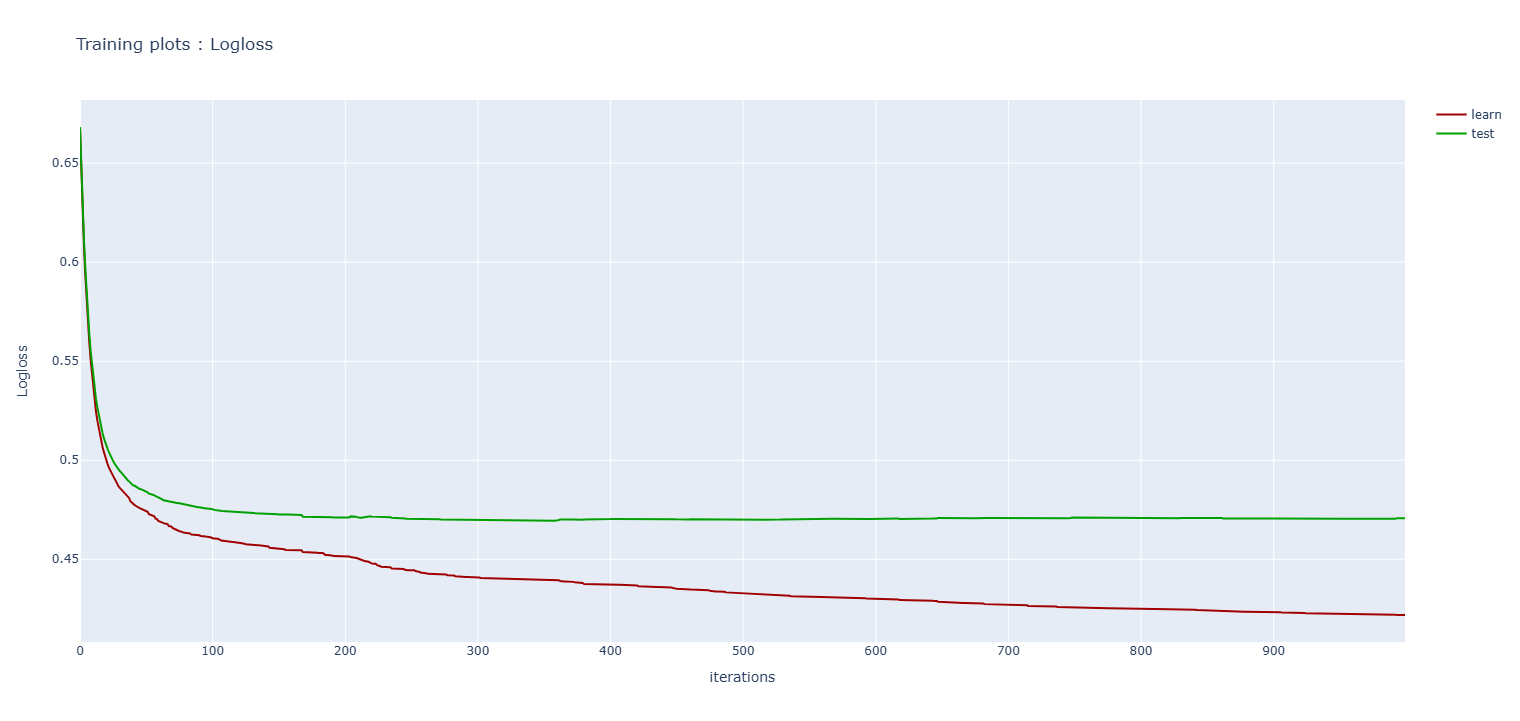

Видно, что модель обучается и лосс падает. Посмотрим на report.

In [26]:
y_predict_boost = model_auto.predict(X_test_features)

In [28]:
print(classification_report(y_test, y_predict_boost))
print(roc_auc_score(y_test, model_auto.predict_proba(X_test_features)[:, 1]))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1070
           1       0.78      0.14      0.23       290

    accuracy                           0.81      1360
   macro avg       0.80      0.56      0.56      1360
weighted avg       0.80      0.81      0.75      1360

0.6973880116016757


Рок аук заметно отличается от 0.5, значит, классификатор не случайный - это хорошо. С другой стороны, минорному классу опять досталось (f1-score = 0.35 при f-1score=0.89  для второго класса). Попробуем использовать веса для классов.

In [48]:
torch.cuda.empty_cache()
gc.collect()

0

In [29]:
model_weights = CatBoostClassifier(random_seed=42, task_type='GPU', devices='0', auto_class_weights='SqrtBalanced')
model_weights.fit(
        X_train_new,
        y_train_new,
        eval_set=(X_val, y_val),
        plot_file='catboost_sqrt_balanced.html',
        verbose=0)

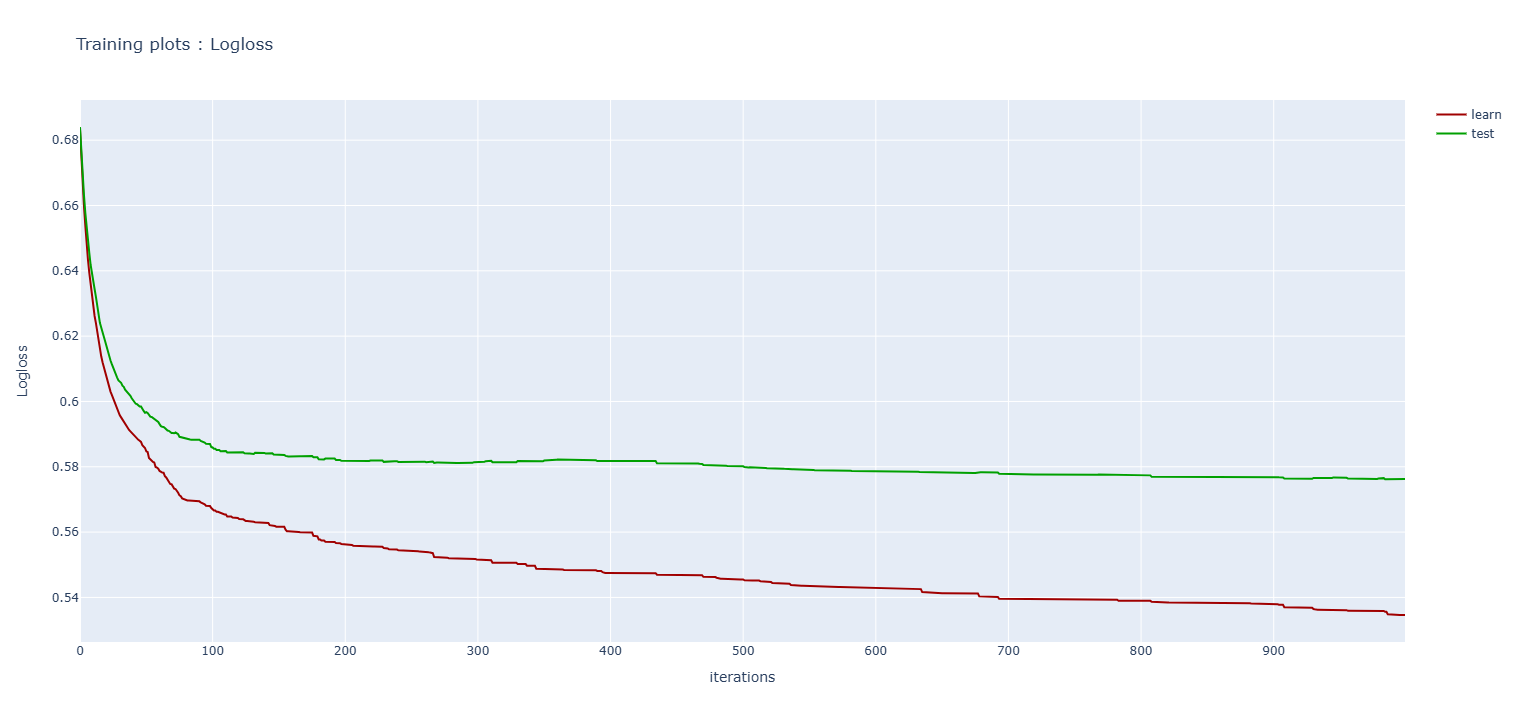

In [30]:
y_predict_boost_weights = model_weights.predict(X_test_features)
print(classification_report(y_test, y_predict_boost_weights))
print(roc_auc_score(y_test, model_weights.predict_proba(X_test_features)[:, 1]))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1070
           1       0.69      0.23      0.35       290

    accuracy                           0.81      1360
   macro avg       0.76      0.60      0.62      1360
weighted avg       0.80      0.81      0.78      1360

0.7009474701901385


Ожидаемо лосс вырос, зато ф мера минорного класса поднялась с 0.23 до 0.35; рок аук незначительно больше.

Попробуем подобрать подходящие гиперпараметры с помощью грид серча. С учетом встроенной кросс-валидации на трейн дадим на сплитованный изначальный трейн сет.

In [31]:
import gc
torch.cuda.empty_cache()
gc.collect()

1042

In [ ]:
# Your parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

cbc = CatBoostClassifier(
    iterations=500,
    early_stopping_rounds=30,
    verbose=False,
    task_type='GPU', devices='0', auto_class_weights='Balanced'
)

# Run grid search (uses internal CV by default or you can pass eval_set)
cbc.grid_search(
    param_grid,
    X_train_features,
    y_train,
    stratified=True,
    plot=True
)

# After it finishes, cbc.get_params() will contain the best params
print("Best params:", cbc.get_params())


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

bestTest = 0.6611201773
bestIteration = 499
0:	loss: 0.6611202	best: 0.6611202 (0)	total: 45.3s	remaining: 19m 36s
bestTest = 0.6563978547
bestIteration = 258
1:	loss: 0.6563979	best: 0.6563979 (1)	total: 1m 10s	remaining: 14m 43s
bestTest = 0.6546739009
bestIteration = 81
2:	loss: 0.6546739	best: 0.6546739 (2)	total: 1m 20s	remaining: 10m 46s
bestTest = 0.6603780897
bestIteration = 499
3:	loss: 0.6603781	best: 0.6546739 (2)	total: 2m 6s	remaining: 12m 6s
bestTest = 0.6502417785
bestIteration = 357
4:	loss: 0.6502418	best: 0.6502418 (4)	total: 2m 40s	remaining: 11m 45s
bestTest = 0.6447193135
bestIteration = 333
5:	loss: 0.6447193	best: 0.6447193 (5)	total: 3m 12s	remaining: 11m 12s
bestTest = 0.6617940819
bestIteration = 499
6:	loss: 0.6617941	best: 0.6447193 (5)	total: 3m 58s	remaining: 11m 20s
bestTest = 0.6543265266
bestIteration = 219
7:	loss: 0.6543265	best: 0.6447193 (5)	total: 4m 20s	remaining: 10m 18s
bestTest = 0.6561905898
bestIteration = 209
8:	loss: 0.6561906	best: 0.64471

Обучим модель с подобранными параметрами.

In [32]:
cbc = CatBoostClassifier(random_seed=42, task_type='GPU', devices='0', auto_class_weights='Balanced',
                        depth=4, learning_rate=0.1, l2_leaf_reg=3, iterations = 2000)
cbc.fit(
        X_train_new,
        y_train_new,
        eval_set=(X_val, y_val),
        plot_file='grid_searched_1.html',
        verbose=0)

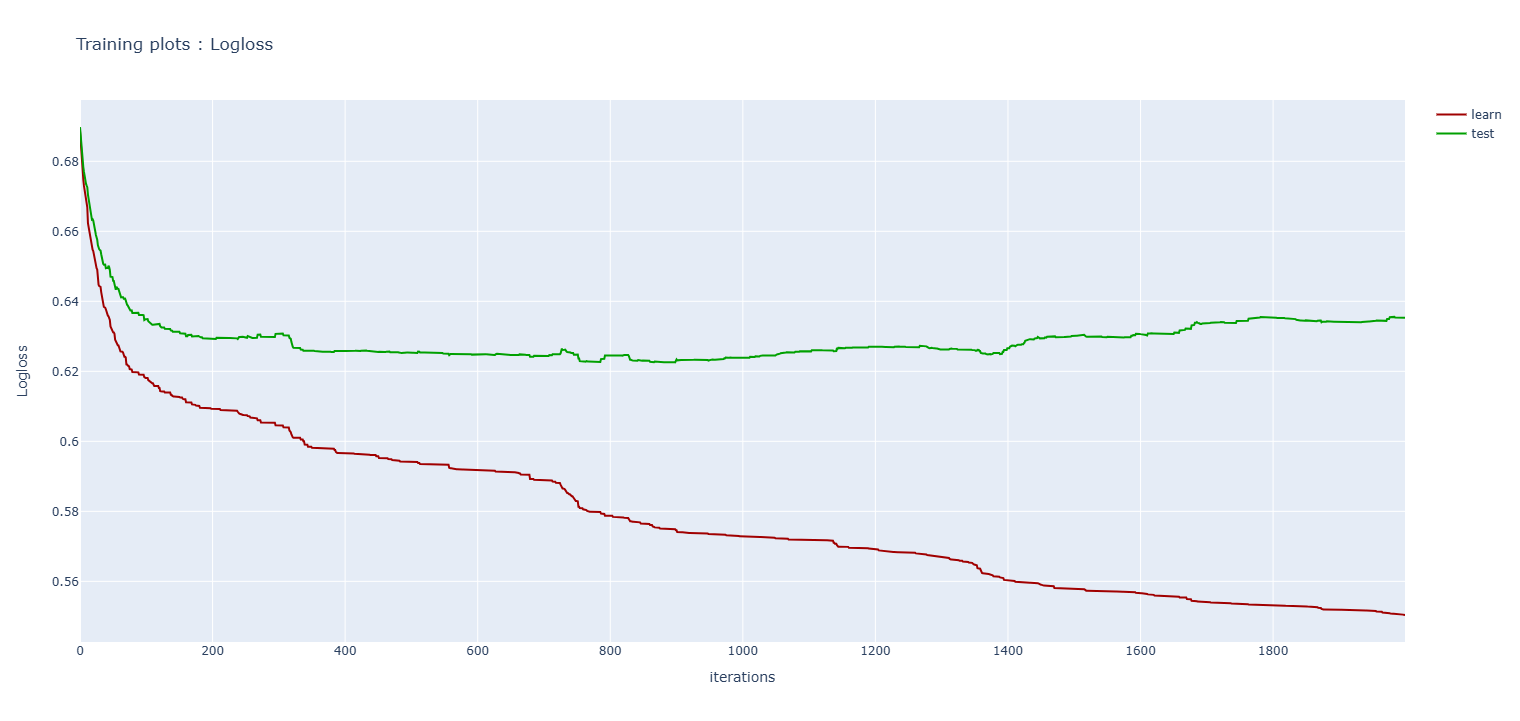

In [33]:
y_predict = cbc.predict(X_test_features)
print(classification_report(y_test, y_predict))
print(roc_auc_score(y_test, cbc.predict_proba(X_test_features)[:, 1]))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73      1070
           1       0.32      0.62      0.42       290

    accuracy                           0.63      1360
   macro avg       0.59      0.63      0.57      1360
weighted avg       0.74      0.63      0.66      1360

0.6916516274572994


Заметно упала аккураси (с 0.81 до 0.63, зато ф-мера для класса 1 уже 0.42).

In [25]:
import gc
torch.cuda.empty_cache()
gc.collect()

18838

Попробуем применить "гибрид" бустинговой модели и рэндом фореста (включаем бэггинг):

In [27]:
cbrf = CatBoostClassifier(
    boosting_type="Plain",
    subsample=0.8,
    bootstrap_type="Bernoulli",
    n_estimators=200,
    depth=8,
    task_type="GPU",
    auto_class_weights='Balanced',                    
    learning_rate=0.1,
)

cbrf.fit(
        X_train_new,
        y_train_new,
        eval_set=(X_val, y_val),
        plot_file='rf-like.html',
        verbose=0)

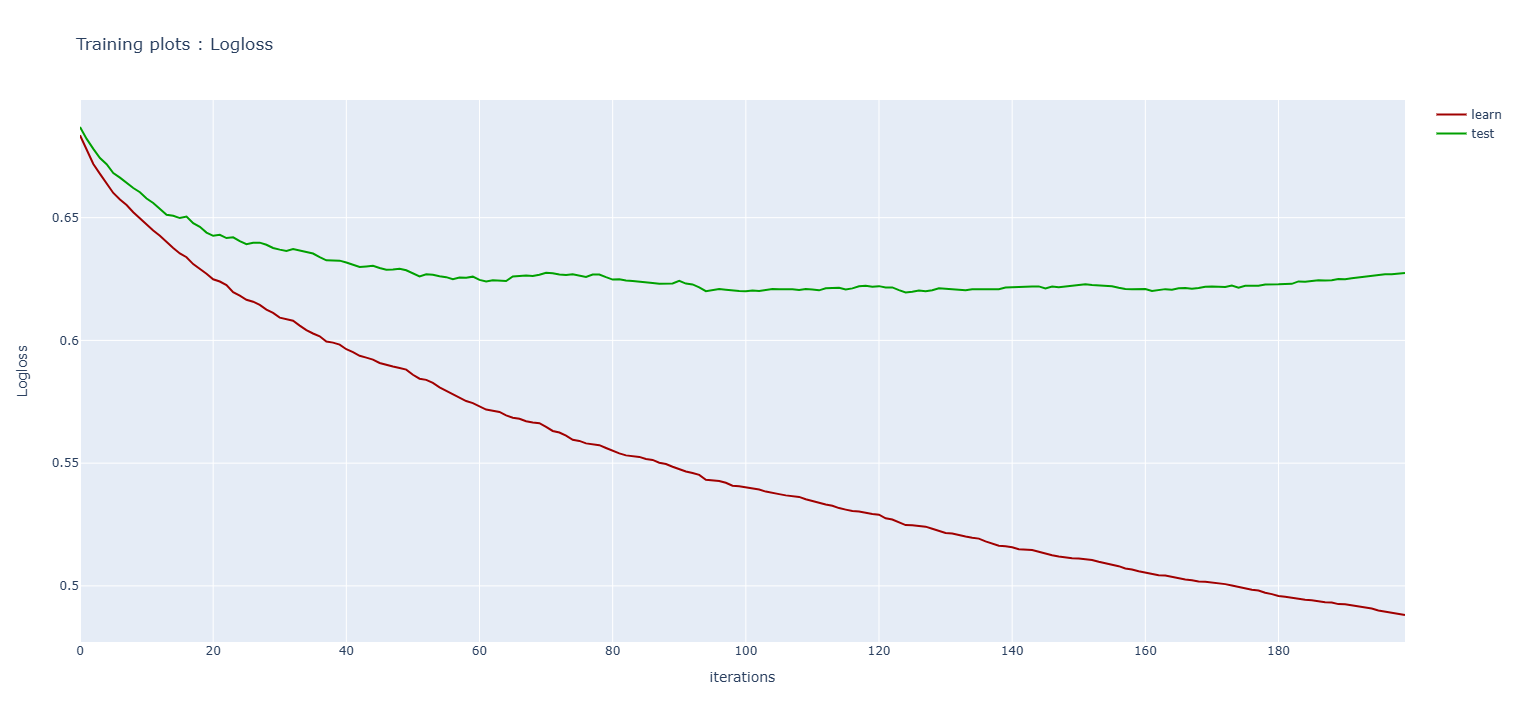

In [28]:
y_predict = cbrf.predict(X_test_features)
print(classification_report(y_test, y_predict))
print(roc_auc_score(y_test, cbrf.predict_proba(X_test_features)[:, 1]))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1070
           1       0.34      0.59      0.43       290

    accuracy                           0.67      1360
   macro avg       0.60      0.64      0.60      1360
weighted avg       0.75      0.67      0.70      1360

0.7097244601998066


Приличные, но не выбивающиеся из предыдущих репортов показатели.

In [ ]:
Как альтернативу также можно рассмотреть lightgbm модель:

In [42]:
import lightgbm as lgb
params = {
    "boosting_type": "GBDT",
    "num_leaves": 64,
    "max_depth": 8,
    "bagging_fraction": 0.8,
    "feature_fraction": 0.8,
    "bagging_freq": 1,
}
lgrf = lgb.LGBMClassifier(
    **params,
    n_estimators=200,
    device="cpu"   # or device="cpu"
)

In [43]:
lgrf.fit(X_train_new,
        y_train_new,
        eval_set=(X_val, y_val),
)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 1044, number of negative: 3850
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.143856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 470833
[LightGBM] [Info] Number of data po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, boosting_type='GBDT',
               device='cpu', feature_fraction=0.8, max_depth=8,
               n_estimators=200, num_leaves=64)

In [44]:
y_predict = lgrf.predict(X_test_features)
print(classification_report(y_test, y_predict))
print(roc_auc_score(y_test, lgrf.predict_proba(X_test_features)[:, 1]))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1070
           1       0.66      0.26      0.37       290

    accuracy                           0.81      1360
   macro avg       0.74      0.61      0.63      1360
weighted avg       0.79      0.81      0.78      1360

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Curre

Достойный рок аук, аккураси и взвешенная ф-мера, но опять за счет снижения качества прогноза для первого класса.

Очевидным ограничением подхода остается сведение белкового комплекса к аминокислотной последовательности. Даже с учетом "умных" эмбеддингов теряется большая часть важной информации о третичной и четвертичной структуре и о расположении отдельных аминокислотных остатков в пространстве. Чтобы немного усилить модель, в качестве категориального признака предадами информацию о распположении мутаций.

In [63]:
loc_X_train = np.array(X_train_meta['iMutation_Location(s)']).reshape(-1, 1)
loc_X_train

array([['SUP'],
       ['RIM,SUR'],
       ['RIM'],
       ...,
       ['SUR'],
       ['RIM'],
       ['COR']], dtype=object)

Как было отмечено ранее, при feature extraction сильно заглушается сигнал от единичных мутаций, особенно в больших комплексах. Возникла идея по ананлогии с, например, resnet  добавить некую residual connection, а именно в данном случае - напрямую в качестве отдельного признака сообщать число мутаций в каждом случае:

In [64]:
num_muts_X_train = [len(s.split(',')) for s in X_train_meta["Mutation(s)_cleaned"]]
num_muts_X_train = np.array(num_muts_X_train).reshape(-1, 1)   # shape (N, 1)
num_muts_X_train

array([[1],
       [2],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [65]:
X_resid_train = np.hstack([ X_train_features, num_muts_X_train, loc_X_train ])
X_resid_train.shape

(5438, 2050)

In [66]:
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_resid_train,
                                                 y_train,
                                                 random_state=43,
                                                test_size=0.1,
                                                stratify=y_train)

In [67]:
loc_X_test = np.array(X_test_meta['iMutation_Location(s)']).reshape(-1, 1)

In [68]:
num_muts_X_test = [len(s.split(',')) for s in X_test_meta["Mutation(s)_cleaned"]]
num_muts_X_test = np.array(num_muts_X_test).reshape(-1, 1)   # shape (N, 1)
num_muts_X_test

array([[1],
       [2],
       [2],
       ...,
       [1],
       [1],
       [3]])

In [69]:
X_resid_test = np.hstack([ X_test_features, num_muts_X_test,  loc_X_test])
X_resid_test.shape

(1360, 2050)

In [85]:
torch.cuda.empty_cache()
gc.collect()

816

In [37]:
cbc = CatBoostClassifier(random_seed=42, task_type='GPU', devices='0', auto_class_weights='Balanced',
                        depth=4, learning_rate=0.05, l2_leaf_reg=4, iterations = 500, cat_features=[2049])
cbc.fit(
        X_train_res,
        y_train_res,
        eval_set=(X_val_res, y_val_res),
        plot_file='more_features.html',
        verbose=0)

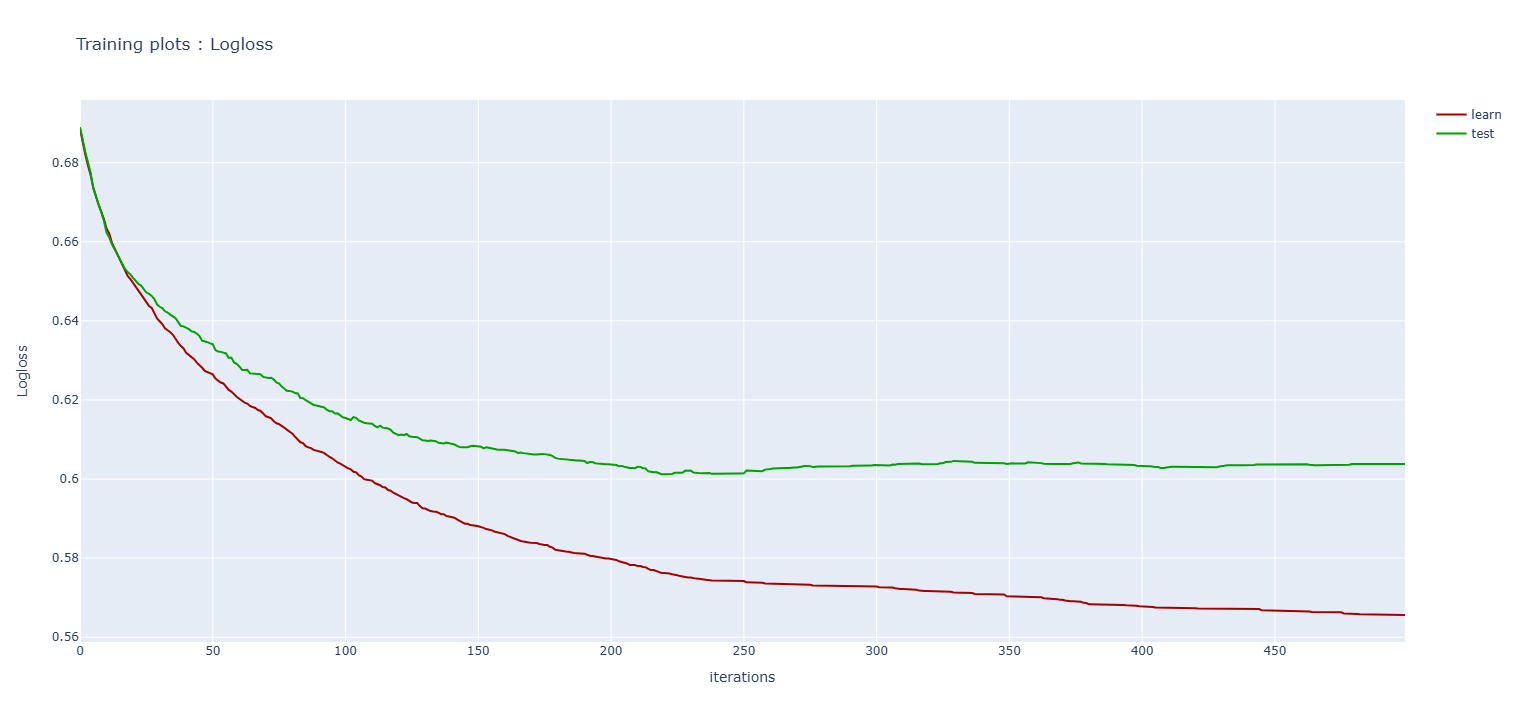

In [38]:
y_predict = cbc.predict(X_resid_test)
print(classification_report(y_test, y_predict))
print(roc_auc_score(y_test, cbc.predict_proba(X_resid_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1070
           1       0.37      0.63      0.47       290

    accuracy                           0.70      1360
   macro avg       0.63      0.67      0.63      1360
weighted avg       0.77      0.70      0.72      1360

0.7356767644215275


Самое большое значение рок-аук среди всех моделей. При аккураси на уровне 0.7 удалось добиться ф-меры в 0.47 для минорного класса.
Подберем на кросс-валидации гиперпараметры.

In [41]:
# Your parameter grid
param_grid = {
    'depth': [4, 5, 6],
    'learning_rate': [0.075, 0.1, 0.25],
    'l2_leaf_reg': [1, 3, 5]
}

cbc = CatBoostClassifier(
    iterations=700,
    early_stopping_rounds=30,
    verbose=False,
    task_type='GPU', devices='0', auto_class_weights='Balanced', cat_features=[2049]
)

# Run grid search (uses internal CV by default or you can pass eval_set)
cbc.grid_search(
    param_grid,
    X_resid_train,
    y_train,
    stratified=True,
    plot=True
)

# After it finishes, cbc.get_params() will contain the best params
print("Best params:", cbc.get_params())


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

bestTest = 0.6104341811
bestIteration = 303
0:	loss: 0.6104342	best: 0.6104342 (0)	total: 35.8s	remaining: 15m 30s
bestTest = 0.6111593881
bestIteration = 255
1:	loss: 0.6111594	best: 0.6104342 (0)	total: 1m 6s	remaining: 13m 48s
bestTest = 0.6113775521
bestIteration = 73
2:	loss: 0.6113776	best: 0.6104342 (0)	total: 1m 17s	remaining: 10m 23s
bestTest = 0.609842955
bestIteration = 304
3:	loss: 0.6098430	best: 0.6098430 (3)	total: 1m 54s	remaining: 10m 56s
bestTest = 0.605372631
bestIteration = 270
4:	loss: 0.6053726	best: 0.6053726 (4)	total: 2m 26s	remaining: 10m 45s
bestTest = 0.6053038607
bestIteration = 92
5:	loss: 0.6053039	best: 0.6053039 (5)	total: 2m 40s	remaining: 9m 20s
bestTest = 0.6101203113
bestIteration = 293
6:	loss: 0.6101203	best: 0.6053039 (5)	total: 3m 15s	remaining: 9m 17s
bestTest = 0.6081042123
bestIteration = 394
7:	loss: 0.6081042	best: 0.6053039 (5)	total: 4m 1s	remaining: 9m 33s
bestTest = 0.6137912268
bestIteration = 107
8:	loss: 0.6137912	best: 0.6053039 (5)

In [86]:
cbc = CatBoostClassifier(random_seed=140, task_type='GPU', devices='0', auto_class_weights='Balanced',
                        depth=6, learning_rate=0.25, l2_leaf_reg=3, iterations = 2000, cat_features=[2049])
cbc.fit(
        X_train_res,
        y_train_res,
        eval_set=(X_val_res, y_val_res),
        plot_file='final.html',
        verbose=0)

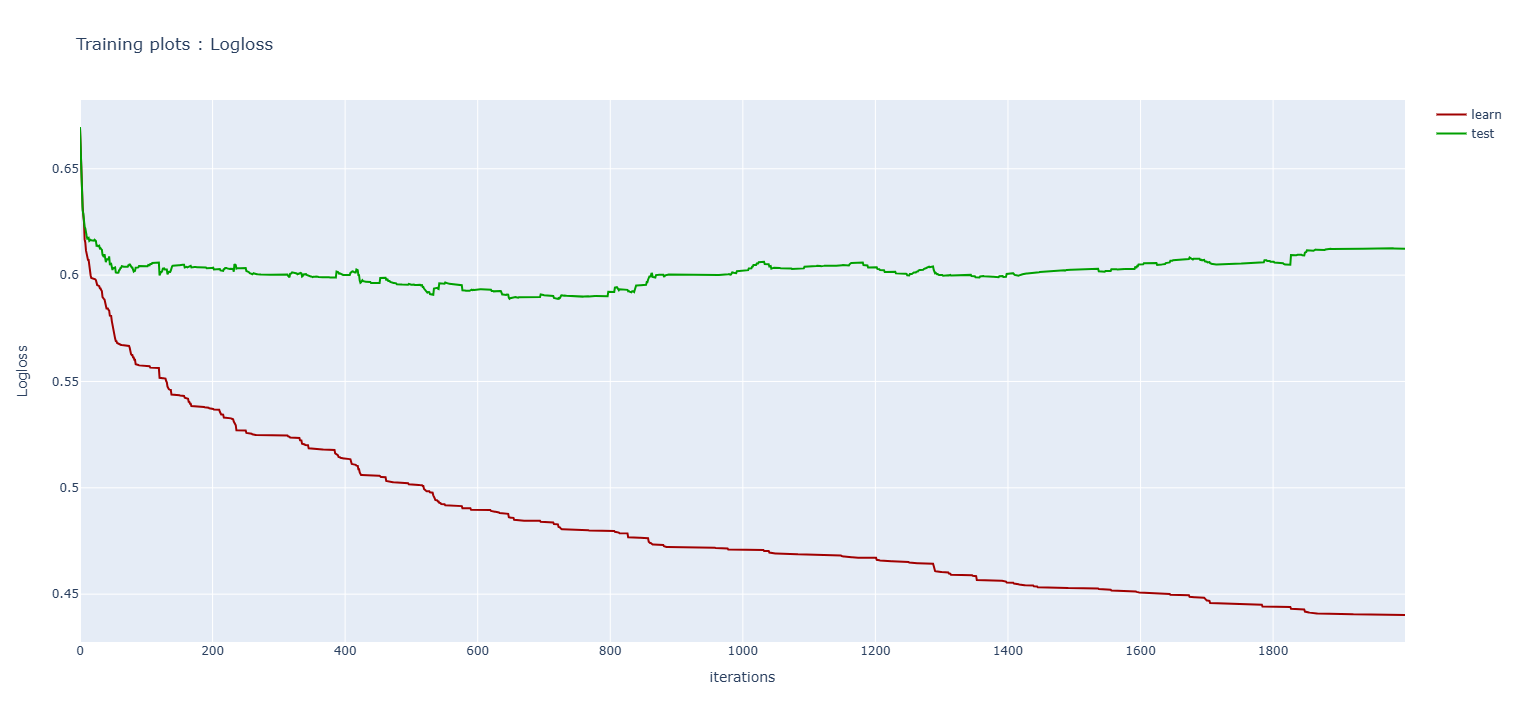

In [87]:
y_predict = cbc.predict(X_resid_test)
print(classification_report(y_test, y_predict))
print(roc_auc_score(y_test, cbc.predict_proba(X_resid_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1070
           1       0.38      0.66      0.48       290

    accuracy                           0.70      1360
   macro avg       0.63      0.69      0.64      1360
weighted avg       0.78      0.70      0.72      1360

0.7472719948436997


Нам удалось добиться почти 0.5 ф-скора для второго класса при общей аккураси 0.7 и рок-ауке около 0.75. Возможно, последние признаки не сыграли большой роли в этом результате.

При дальнейшей работе можно попробовать использовать небольшую / большую нейронную сеть на тех же данных. Весьма вероятно, что значительно улучшить качество предсказаний можно лишь используя больше данных (заметим, что .pdb файлы в данной имплементации вообще не использовались). Также перспективным кажется использование графовых нейронных сетей, так как графы хорошо подходят для описания пространственной структуры белковых комплексов.

In [88]:
cbc.save_model(
    "catboost_model.json",
    format="json"
)